# Représenter les positions successives d’un système modélisé par un point lors d’une évolution unidimensionnelle ou bidimensionnelle

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Bille ponctuelle évoluant sur un rail (théorie)

### A vitesse constante
On considère une bille lancée à vitesse constante $v$, à partir d'un point $x_0$ du rail, vers les $x$ croissants.

In [2]:
# création des instants
t = np.linspace(0, 20, 10)

In [3]:
# vitesse
v = 10
# position initiale sur l'axe du rail
d0 = 70

In [4]:
# distance parcourue
d = v * t + d0

Text(0.5,1,'Distance parcourue au cours du temps')

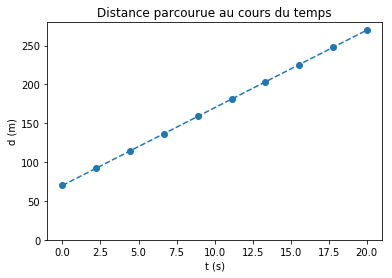

In [5]:
plt.plot(t, d, 'o--')
plt.xlabel('t (s)')
plt.ylabel('d (m)')
plt.axis(ymin=0)
plt.title('Distance parcourue au cours du temps')

### A vitesse croissante, accélération constante
On considère une bille lancée à accélération constante $a$, à partir de l'origine du rail sans vitesse initiale, vers les $x$ croissants.

- La vitesse croît linéairement : $v = a \cdot t$
- la position croît de manière quadratique : $d = \dfrac{1}{2} \times a \cdot t^2$

In [6]:
# création des instants
t = np.linspace(0, 20, 20)

# accélération
a = 10

# distance parcourue au cours du temps
d = 0.5 * a * t**2

Text(0.5,1,'Distance parcourue au cours du temps')

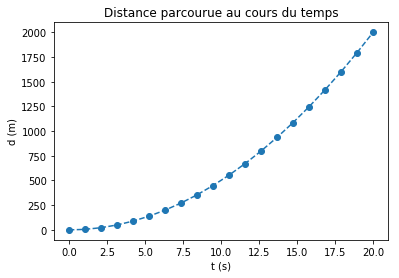

In [7]:
plt.plot(t, d, 'o--')
plt.xlabel('t (s)')
plt.ylabel('d (m)')
plt.title('Distance parcourue au cours du temps')

# Bille ponctuelle lâchée d'une hauteur $h$ sans vitesse initiale (expérience)
On travaille avec des relevés de positions au cours du temps obtenus à partir du film d'une chute (ex : Regavi)

In [8]:
h0 = 2
h = [2, 1.94, 1.76, 1.44, 1.03, .49, 0]
t = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6] # liste python classique

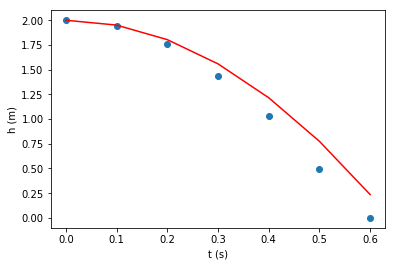

In [9]:
plt.plot(t, h, 'o')
plt.xlabel('t (s)')
plt.ylabel('h (m)')

# modélisation par une chute libre (courbe rouge)
g = 9.8
y = h0 - 0.5 * g * np.array(t)**2 # il faut convertir t en ndarray (tableau de numpy)
plt.plot(t, y, color='red')

# Mouvement parabolique (théorie)
On considère une bille lancée d'une hauteur $h$, avec un angle $\alpha$ par rapport à l'horizontale, et une vitesse intiale $v_0$.

In [10]:
# hauteur de lancement (m)
h = 5
# angle en degré, puis conversion en radians
alpha = 40
alpha = np.radians(alpha) 
# vitesse initiale (m/s)
v0 = 20
# intensité de la pesanteur (m/s2)
g = 9.8

In [11]:
# création des instants
t = np.linspace(0, 3, 30)

In [12]:
# coordonnées de positions (x, y) en fonction du temps
x = v0 * np.cos(alpha) * t

y = -0.5 * g * t**2 + v0 * np.sin(alpha) * t + h

# équation de la trajectoire
traj = -0.5 * g * (x / (v0 * np.cos(alpha)))**2 + np.tan(alpha) * x + h

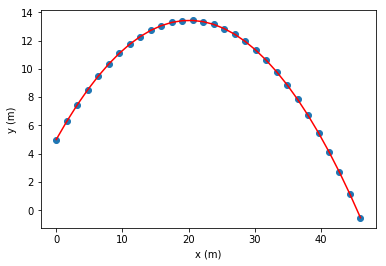

In [13]:
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.plot(x, traj, 'red')

# Tracer des vecteurs vitesse
On reprend les données précédentes du mouvement parabolique.

###  Calcul des coordonnées (approximation discrète) du vecteur vitesse
Si j'ai bien compris, on nous demande désormais d'utiliser la définition suivante pour le vecteur vitesse :

$v_{x}[i] = \dfrac{x_{[i+1]} - x_{[i]}} {t_{[i+1]} - t_{[i]}}$

$v_{y}[i] = \dfrac{y_{[i+1]} - y_{[i]}} {t_{[i+1]} - t_{[i]}}$

La valeur de $v[0]$ reste définie sans problème avec cette "vision" des choses, et la dernière valeur $v[-1]$ n'existe simplement pas ! (on choisira une valeur nulle arbitrairement, pour conserver la même taille pour les donnnées -- c'est un choix personnel !)

In [14]:
# calcul des coordonnées de v
vx = []
for i in range(len(x)-1):
    vx.append((x[i+1] - x[i]) / (t[i+1] - t[i]))
vx.append(0)   # on ajoute une valeur sans sens (arbitrairement nulle) à la fin pour avoir la même taille de données 

vy = []
for i in range(len(y)-1):
    vy.append((y[i+1] - y[i]) / (t[i+1] - t[i]))
vy.append(0)     

### Tracé du vecteur vitesse
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html#matplotlib.pyplot.quiver

Remarques sur les paramètres d'affichage du vecteur :
- le paramètres ```angles='xy'``` indique que le vecteur a une composante horizontale x et verticale y.
- le paramètres ```scale_units='xy'``` indique que l'échelle pour le vecteur se réfère aux axes xy.
- le paramètres ```scale=<nombre>``` définit l'échelle de réprésentation du vecteur (grande valeur => petites flèches).
- le paramètres ```units='dots``` permet de conserver une échelle fixe de représentation du vecteur si on zomme sur le graphe.

Remarque complémentaire :
- pour 'voir' correctement les vecteurs, il ne faut pas les tracer à tous les points

*ex : ci-dessous, on représente le vecteur toutes les 4 positions seulement*


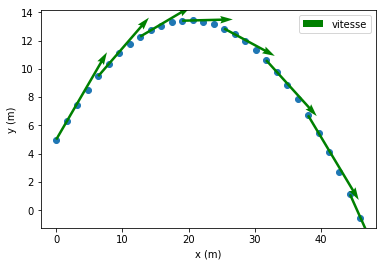

In [15]:
#%matplotlib notebook
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')

# ajout des vecteurs vitesse
# on ne conserve qu'un point sur 4 (pour la lisibilité), et on exclut le dernier point
plt.quiver(x[:-1:4], y[:-1:4], vx[:-1:4], vy[:-1:4], angles='xy', units='dots', scale_units='xy', scale=2, color='green', label='vitesse')
plt.legend()

### Hors-programme de 2nde : vecteur accélération
C'est hors-programme, mais ça vaut le coup de voir ce que ça donne...

In [16]:
# calcul des coordonnées de a
ax = []
for i in range(len(vx)-1):
    ax.append((vx[i+1] - vx[i]) / (t[i+1] - t[i]))
ax.append(0)

ay = []
for i in range(len(vy)-1):
    ay.append((vy[i+1] - vy[i-1]) / (t[i+1] - t[i]))
ay.append(0)

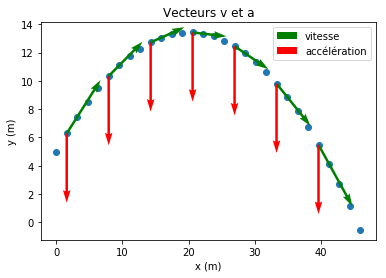

In [17]:
plt.title("Vecteurs v et a")
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')

plt.quiver(x[1:-2:4], y[1:-2:4], vx[1:-2:4], vy[1:-2:4],  angles='xy', units='dots', scale_units='xy', scale=3, color='green', label='vitesse')
plt.quiver(x[1:-2:4], y[1:-2:4], ax[1:-2:4], ay[1:-2:4],  angles='xy', units='dots', scale_units='xy', scale=4, color='red', label='accélération')
plt.legend()

### Au programme de 2nde : variation de vecteur vitesse
C'est très similaire au paragraphe précédent.
La seule différence avec l'accélération est qu'on ne divise pas par le temps !

In [18]:
# calcul des coordonnées du vecteur variation de vitesse
Dvx = []
for i in range(len(vx)-1):
    Dvx.append(vx[i+1] - vx[i])
Dvx.append(0)

Dvy = []
for i in range(len(vy)-1):
    Dvy.append(vy[i+1] - vy[i])
Dvy.append(0)

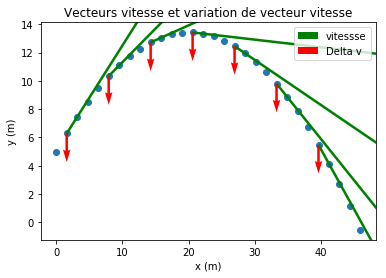

In [19]:
plt.title("Vecteurs vitesse et variation de vecteur vitesse")
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')

plt.quiver(x[1:-2:4], y[1:-2:4], vx[1:-2:4], vy[1:-2:4],  angles='xy', units='dots', scale_units='xy', scale=0.5, color='green', label='vitessse')
plt.quiver(x[1:-2:4], y[1:-2:4], Dvx[1:-2:4], Dvy[1:-2:4],  angles='xy', units='dots', scale_units='xy', scale=0.5, color='red', label='Delta v')
plt.legend()